In [82]:
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


In [83]:
import tensorflow as tf
import matplotlib as pl
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds

(f_train, f_test), f_info = tfds.load('fashion_mnist', split=['train','test'],  with_info=True, as_supervised=True)
(d_train, d_test), d_info = tfds.load('mnist', split=['train', 'test'], with_info=True, as_supervised=True)

In [84]:
some_examples = tfds.as_dataframe(f_train.take(5), f_info)
some_examples.iloc[0].image[0]

array([[  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [ 18],
       [ 77],
       [227],
       [227],
       [208],
       [210],
       [225],
       [216],
       [ 85],
       [ 32],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0]], dtype=uint8)

FMNIST and MNIST both present images as 28 x 28 x 1 np arrays of integers in [0, 255]. Because Keras can directly handle datasets, we don't necessarily need to process them further to feed into a CNN, and indeed that would be smart if the datasets were too large to fit in memory. On the other hand, for this little project, I want to indicate what's happening inside the datasets, so I'll extract to a dataframe and process that.

In [85]:
type(f_train)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [86]:
f_train_df = tfds.as_dataframe(f_train, f_info)
f_test_df = tfds.as_dataframe(f_test, f_info)
d_train_df = tfds.as_dataframe(d_train, d_info)
d_test_df = tfds.as_dataframe(d_test, d_info)

In [87]:
print(f_train_df.iloc[0], f_train_df.dtypes)

image    [[[0], [0], [0], [0], [0], [0], [0], [0], [0],...
label                                                    2
Name: 0, dtype: object image    object
label     int64
dtype: object


f_train_df has an image column consisting of a 28 x 28 x 1 np array of np uint8, and a np int64 label (0 to 9) 

In [88]:
type(f_train_df.image.iloc[0])

numpy.ndarray

In [89]:
f_train_df.head()

,image,label
0,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",2
1,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",1
2,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",8
3,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",4
4,"[[[0], [0], [0], [0], [0], [0], [0], [0], [0],...",1


Let's start with a naive neural network approach: going straight from input to output with a single dense layer. 

In [90]:
X_trainval_f = np.stack(f_train_df.image.to_numpy())
X_test_f = np.stack(f_test_df.image.to_numpy())
X_trainval_d = np.stack(d_train_df.image.to_numpy())
X_test_d = np.stack(d_test_df.image.to_numpy())

In [91]:
y_trainval_f = f_train_df.label.to_numpy()
y_test_f = f_test_df.label.to_numpy()
y_trainval_d = d_train_df.label.to_numpy()
y_test_d = d_test_df.label.to_numpy()

In [92]:
X_train_f, X_val_f, y_train_f, y_val_f = train_test_split(X_trainval_f, y_trainval_f, test_size=.2, random_state=926)
X_train_d, X_val_d, y_train_d, y_val_d = train_test_split(X_trainval_d, y_trainval_d, test_size=.2, random_state=926)

In [93]:
inputs = tf.keras.Input(shape=(28, 28, 1))

In [105]:
model0 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(10)
])

In [106]:
model0.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_20 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_32 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


The following compile statement will be unchanged for all models I run today, unless there's serious evidence a model is failing to converge. Adam is a little opaque algorithm-wise, but its performance is state-of-the-art according to the literature.

In [107]:
model0.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [108]:
history0 = model0.fit(X_train_f, y_train_f, epochs=6, validation_data=(X_val_f, y_val_f))

Epoch 1/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6252 - sparse_categorical_accuracy: 0.7867 - val_loss: 0.5036 - val_sparse_categorical_accuracy: 0.8234
Epoch 2/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4746 - sparse_categorical_accuracy: 0.8368 - val_loss: 0.4528 - val_sparse_categorical_accuracy: 0.8469
Epoch 3/6
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4454 - sparse_categorical_accuracy: 0.8469 - val_loss: 0.4334 - val_sparse_categorical_accuracy: 0.8528
Epoch 4/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4286 - sparse_categorical_accuracy: 0.8531 - val_loss: 0.4320 - val_sparse_categorical_accuracy: 0.8507
Epoch 5/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4190 - sparse_categorical_accuracy: 0.8542 - val_loss: 0.4176 - val_sparse_categorical_accuracy: 0.8567
Epoch 6/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4126 - sparse_cate

I am fairly astonished that this neural network handles so much of fmnist accurately

In [109]:
model0.evaluate(X_test_f, y_test_f)

313/313 [==============================] - 1s 1ms/step - loss: 0.4483 - sparse_categorical_accuracy: 0.8440


[0.44826844334602356, 0.843999981880188]

The test accuracy is 84.4%, without any deep learning! MNIST will presumably be similar 

In [110]:
d_model0 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(10)
])
d_model0.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
d_history0 = d_model0.fit(X_train_d, y_train_d, epochs=6, validation_data=(X_val_d, y_val_d))


Epoch 1/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5095 - sparse_categorical_accuracy: 0.8682 - val_loss: 0.3372 - val_sparse_categorical_accuracy: 0.9095
Epoch 2/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3138 - sparse_categorical_accuracy: 0.9121 - val_loss: 0.3055 - val_sparse_categorical_accuracy: 0.9158
Epoch 3/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2887 - sparse_categorical_accuracy: 0.9190 - val_loss: 0.2936 - val_sparse_categorical_accuracy: 0.9182
Epoch 4/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2762 - sparse_categorical_accuracy: 0.9221 - val_loss: 0.2909 - val_sparse_categorical_accuracy: 0.9213
Epoch 5/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2687 - sparse_categorical_accuracy: 0.9253 - val_loss: 0.2863 - val_sparse_categorical_accuracy: 0.9203
Epoch 6/6
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2630 - sparse_cate

In [111]:
d_model0.evaluate(X_test_d, y_test_d)

313/313 [==============================] - 1s 1ms/step - loss: 0.2682 - sparse_categorical_accuracy: 0.9249


[0.26818469166755676, 0.9248999953269958]

92.1% validation accuracy, 92.5% test accuracy. MNIST is well-known for producing these high accuracy results. But can these be improved?

We'll start by adding some depth to the first neural network.

In [112]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3,
                                            verbose=1)
# This was added in response to early tests revealing under-training,
# see below.

In [114]:
model1 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

In [115]:
model2 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10)
])


In [116]:
model1.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [117]:
history1 = model1.fit(X_train_f, y_train_f, epochs=20, 
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5500 - sparse_categorical_accuracy: 0.8103 - val_loss: 0.4318 - val_sparse_categorical_accuracy: 0.8497
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4069 - sparse_categorical_accuracy: 0.8560 - val_loss: 0.3940 - val_sparse_categorical_accuracy: 0.8630
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3678 - sparse_categorical_accuracy: 0.8681 - val_loss: 0.3638 - val_sparse_categorical_accuracy: 0.8694
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3452 - sparse_categorical_accuracy: 0.8749 - val_loss: 0.3762 - val_sparse_categorical_accuracy: 0.8583
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3265 - sparse_categorical_accuracy: 0.8804 - val_loss: 0.3282 - val_sparse_categorical_accuracy: 0.8832
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3088 - spars

In [118]:
history2 = model2.fit(X_train_f, y_train_f, epochs=20,
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5445 - sparse_categorical_accuracy: 0.8082 - val_loss: 0.4822 - val_sparse_categorical_accuracy: 0.8267
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3999 - sparse_categorical_accuracy: 0.8572 - val_loss: 0.3756 - val_sparse_categorical_accuracy: 0.8644
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3660 - sparse_categorical_accuracy: 0.8679 - val_loss: 0.3561 - val_sparse_categorical_accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3407 - sparse_categorical_accuracy: 0.8761 - val_loss: 0.3426 - val_sparse_categorical_accuracy: 0.8740
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3241 - sparse_categorical_accuracy: 0.8808 - val_loss: 0.3526 - val_sparse_categorical_accuracy: 0.8729
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3089 - spars

The first few runs here, I kept incrasing epoch count because the validation error kept going down. But then overtraining set in, and it is worthwhile to stop training at that point. So I put in a callback above, and ran both models until the val_loss stopped going down. The larger model performed only slightly better than the smaller one.

Both models perform better on the validation set than model0, so there's some value to deep learning!
I will refrain from running them against the test set until the very end, because I may want to fiddle with hyperparameters some more.

For instance, let's fiddle with model2 by adding in more nodes in the dense layers.

In [119]:
model3 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])
model3.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [120]:
history3 = model3.fit(X_train_f, y_train_f, epochs=20,
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4959 - sparse_categorical_accuracy: 0.8219 - val_loss: 0.4011 - val_sparse_categorical_accuracy: 0.8600
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3702 - sparse_categorical_accuracy: 0.8643 - val_loss: 0.3571 - val_sparse_categorical_accuracy: 0.8704
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3347 - sparse_categorical_accuracy: 0.8753 - val_loss: 0.3376 - val_sparse_categorical_accuracy: 0.8762
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3106 - sparse_categorical_accuracy: 0.8847 - val_loss: 0.3208 - val_sparse_categorical_accuracy: 0.8813
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2913 - sparse_categorical_accuracy: 0.8911 - val_loss: 0.3453 - val_sparse_categorical_accuracy: 0.8740
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2764 - spars

The most minor of improvements! Let's compare to what we can do with a CNN.

In [122]:
model4 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Flatten(input_shape=(28,28,1)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])



In [123]:
model4.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [124]:
history4 = model4.fit(X_train_f, y_train_f, epochs=20,
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 34s 22ms/step - loss: 0.4174 - sparse_categorical_accuracy: 0.8512 - val_loss: 0.3086 - val_sparse_categorical_accuracy: 0.8896
Epoch 2/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2790 - sparse_categorical_accuracy: 0.8987 - val_loss: 0.2649 - val_sparse_categorical_accuracy: 0.9061
Epoch 3/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.2330 - sparse_categorical_accuracy: 0.9152 - val_loss: 0.2480 - val_sparse_categorical_accuracy: 0.9138
Epoch 4/20
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1996 - sparse_categorical_accuracy: 0.9269 - val_loss: 0.2444 - val_sparse_categorical_accuracy: 0.9143
Epoch 5/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.1738 - sparse_categorical_accuracy: 0.9358 - val_loss: 0.2426 - val_sparse_categorical_accuracy: 0.9143
Epoch 6/20
1500/1500 [==============================] - 26s 17ms/step - loss: 0.

This basic CNN improves validation accuracy to 91.9%, but is seriously overtraining. What if we add a layer and some dropout?

In [126]:
model5 = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])


In [127]:
model5.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [128]:
history5 = model5.fit(X_train_f, y_train_f, epochs=20,
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 32s 21ms/step - loss: 0.6050 - sparse_categorical_accuracy: 0.7801 - val_loss: 0.3582 - val_sparse_categorical_accuracy: 0.8701
Epoch 2/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.4007 - sparse_categorical_accuracy: 0.8557 - val_loss: 0.3152 - val_sparse_categorical_accuracy: 0.8822
Epoch 3/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.3499 - sparse_categorical_accuracy: 0.8717 - val_loss: 0.2901 - val_sparse_categorical_accuracy: 0.8934
Epoch 4/20
1500/1500 [==============================] - 31s 20ms/step - loss: 0.3188 - sparse_categorical_accuracy: 0.8846 - val_loss: 0.2777 - val_sparse_categorical_accuracy: 0.8937
Epoch 5/20
1500/1500 [==============================] - 31s 21ms/step - loss: 0.2942 - sparse_categorical_accuracy: 0.8920 - val_loss: 0.2687 - val_sparse_categorical_accuracy: 0.8989
Epoch 6/20
1500/1500 [==============================] - 30s 20ms/step - loss: 0.

This was slow and ultimately ineffective, with a little overtraining for good measure. We will need to implement another CNN to get sustainably >90% validation accuracy. Let's try batch normalization, as recommended by "An Ensemble of Simple Convolutional Neural Network Models for MNIST Digit Recognition".

In [129]:
model6 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Conv2D(64, kernel_size=(5,5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size=(5,5), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(10)
])

In [130]:
model6.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

In [131]:
model6.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_29 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_39 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 batch_normalization_23 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 batch_normalization_24 (Bat  (None, 14, 14, 128)    

In [132]:
history6 = model6.fit(X_train_f, y_train_f, epochs=20,
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 240s 159ms/step - loss: 0.6178 - sparse_categorical_accuracy: 0.8323 - val_loss: 0.4381 - val_sparse_categorical_accuracy: 0.8693
Epoch 2/20
1500/1500 [==============================] - 236s 157ms/step - loss: 0.3660 - sparse_categorical_accuracy: 0.8860 - val_loss: 0.3052 - val_sparse_categorical_accuracy: 0.9049
Epoch 3/20
1500/1500 [==============================] - 237s 158ms/step - loss: 0.2755 - sparse_categorical_accuracy: 0.9069 - val_loss: 0.2588 - val_sparse_categorical_accuracy: 0.9082
Epoch 4/20
1500/1500 [==============================] - 235s 156ms/step - loss: 0.2295 - sparse_categorical_accuracy: 0.9184 - val_loss: 0.3052 - val_sparse_categorical_accuracy: 0.8929
Epoch 5/20
1500/1500 [==============================] - 237s 158ms/step - loss: 0.1938 - sparse_categorical_accuracy: 0.9299 - val_loss: 0.2410 - val_sparse_categorical_accuracy: 0.9194
Epoch 6/20
1500/1500 [==============================] - 234s 156ms/ste

These results are pretty mediocre, especially given the amount of compute involved. After Epoch 7, the validation loss as pretty good, but then the model started seriously overtraining.

To end, let's simply add some padding to Model 5; hopefully that improves performance to something decent.



In [133]:
model7 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(10)
])
model7.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])
model7.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_30 (Rescaling)    (None, 28, 28, 1)         0         
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_30 (Flatten)        (None, 3136)            

In [134]:
history7 = model7.fit(X_train_f, y_train_f, epochs=20,
                      validation_data=(X_val_f, y_val_f), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.5982 - sparse_categorical_accuracy: 0.7860 - val_loss: 0.3583 - val_sparse_categorical_accuracy: 0.8682
Epoch 2/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.4045 - sparse_categorical_accuracy: 0.8567 - val_loss: 0.2998 - val_sparse_categorical_accuracy: 0.8889
Epoch 3/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.3534 - sparse_categorical_accuracy: 0.8757 - val_loss: 0.2589 - val_sparse_categorical_accuracy: 0.9076
Epoch 4/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.3133 - sparse_categorical_accuracy: 0.8864 - val_loss: 0.2436 - val_sparse_categorical_accuracy: 0.9129
Epoch 5/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.2870 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.2363 - val_sparse_categorical_accuracy: 0.9141
Epoch 6/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.

This relatively simple CNN appears to be todays winner, with a validation accuracy of 92.6%. 

Text(0, 0.5, 'Accuracy')

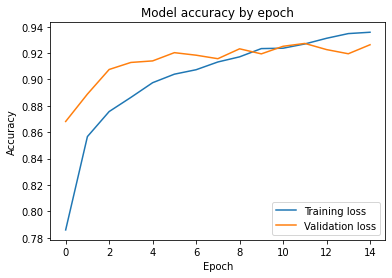

In [137]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history7.history['sparse_categorical_accuracy'], label="Training loss")
plt.plot(history7.history['val_sparse_categorical_accuracy'], label="Validation loss")
plt.title("Model accuracy by epoch")
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

Model 7 is not seriously overtrained, but it is definitely good that we stopped when we did.

 Let's test all these models, declaring in advance that Model 7 is my "official" model.

313/313 [==============================] - 3s 8ms/step - loss: 0.2437 - sparse_categorical_accuracy: 0.9182


Text(0.5, 0, 'Model')

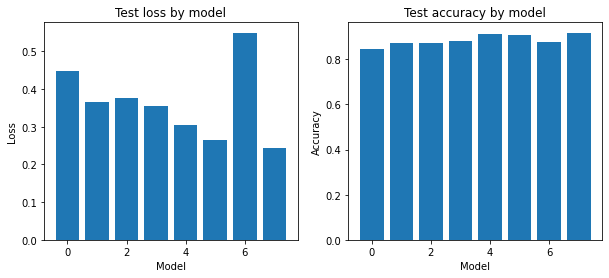

In [144]:
models = [
    model0,
    model1,
    model2,
    model3,
    model4,
    model5,
    model6,
    model7
]
loss = []
accuracy = []
for model in models:
  v = model.evaluate(X_test_f, y_test_f)
  loss.append(v[0])
  accuracy.append(v[1])

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.bar(range(8), loss)
plt.title("Test loss by model")
plt.ylabel("Loss")
plt.xlabel("Model")
plt.subplot(122)
plt.bar(range(8), accuracy)
plt.title("Test accuracy by model")
plt.ylabel("Accuracy")
plt.xlabel("Model")



Our official model, model 7, has the highest test accuracy! Its test accuracy of 91.8% beats out every other model. Model 4 likewise performed fairly well. Model 6, on the other hand, dramatically underperforms the other CNNs, especially with respect to test loss. It's worth investigating what caused that.

Now let's implement Model 7 on MNIST quickly. It is well-established that MNIST is a fairly easy problem, so I expect good performance.

In [145]:
d_model7 = tf.keras.Sequential([
    layers.InputLayer(input_shape=(28,28,1)),
    layers.Rescaling(1.0/255),
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(10)
])
d_model7.compile(optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


In [146]:
d_history7 = d_model7.fit(X_train_d, y_train_d, epochs=20,
                      validation_data=(X_val_d, y_val_d), callbacks=[callback])

Epoch 1/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2752 - sparse_categorical_accuracy: 0.9150 - val_loss: 0.0675 - val_sparse_categorical_accuracy: 0.9803
Epoch 2/20
1500/1500 [==============================] - 43s 29ms/step - loss: 0.1106 - sparse_categorical_accuracy: 0.9674 - val_loss: 0.0467 - val_sparse_categorical_accuracy: 0.9868
Epoch 3/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0800 - sparse_categorical_accuracy: 0.9762 - val_loss: 0.0422 - val_sparse_categorical_accuracy: 0.9880
Epoch 4/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.0643 - sparse_categorical_accuracy: 0.9803 - val_loss: 0.0424 - val_sparse_categorical_accuracy: 0.9887
Epoch 5/20
1500/1500 [==============================] - 41s 28ms/step - loss: 0.0549 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0400 - val_sparse_categorical_accuracy: 0.9892
Epoch 6/20
1500/1500 [==============================] - 40s 27ms/step - loss: 0.

In [147]:
d_model7.evaluate(X_test_d, y_test_d)

313/313 [==============================] - 3s 8ms/step - loss: 0.0278 - sparse_categorical_accuracy: 0.9923


[0.02784891426563263, 0.9922999739646912]

99.2% accuracy for the same model on MNIST! Now let's save the good models.

In [148]:
model7.save("trained_FMNIST_model")

In [149]:
d_model7.save("trained_MNIST_model")